# Shotplot Archery Shot Analyzer
Shotplot reads an image of a used target and processes it over several steps to derive a position and score for each shot. It currently only recognizes the popular 'single spot' 10 ring target (see below for examples). The **target_reader** performs all processing and stores additional information, like output images from each processing stage.

### Table of Contents
* [1. Imports and Functions](#sec1)
* [2. Load DataFrames and Remove Unnecessary Columns](#sec2)
* [3. Exploratory Data Analysis](#sec3)
* [4. Compare Linear and Lasso Models by DataFrame](#sec4)
* [5. Build Final Model](#sec5)
* [6. Get Test Score](#sec6)
* [7. Compare Linear Model to Random Forest Model](#sec7)
* [8. Calculate Mean Absolute Error](#sec8)
* [9. Find the Most Important Variables](#sec9)
* [10. Plot Residuals](#sec10)

<a id='sec1'></a>
### 1. Imports and Functions
* **target_reader**: Reads in an image of a used archery target and uses openCV to determine
    position and score value for each shot

In [2]:
import sys
import matplotlib.pyplot as plt

sys.path.append('./code')
from target_reader import target_reader

%matplotlib inline

### 2. Instantiate and Run Target Reader
I saved a few sample targets into the **sample_targets** directory. This cell processes one of those at a time.

In [3]:
# Sample range is 1-4
sample_num = 2
sample_file = f'sample_targets/sample_{sample_num}.jpg'

tr = target_reader()
result = tr.run(sample_file)
if result:
    print('Failed:', result)
else:
    print('Success!')

Success!


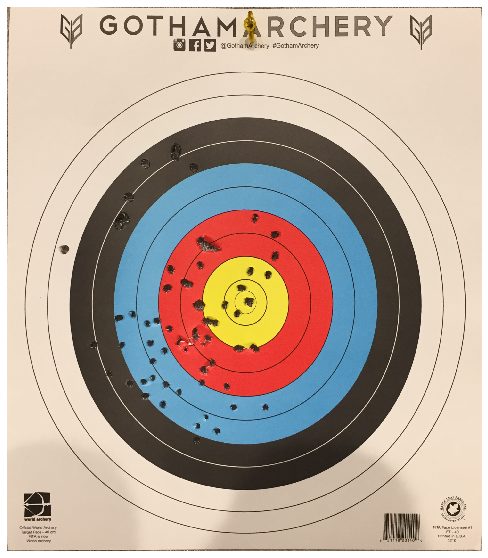

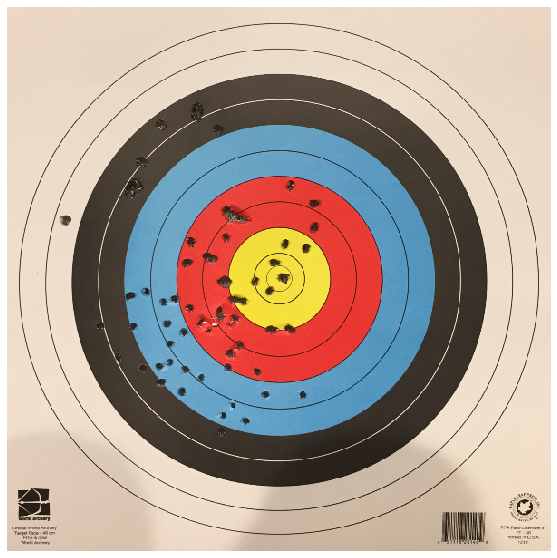

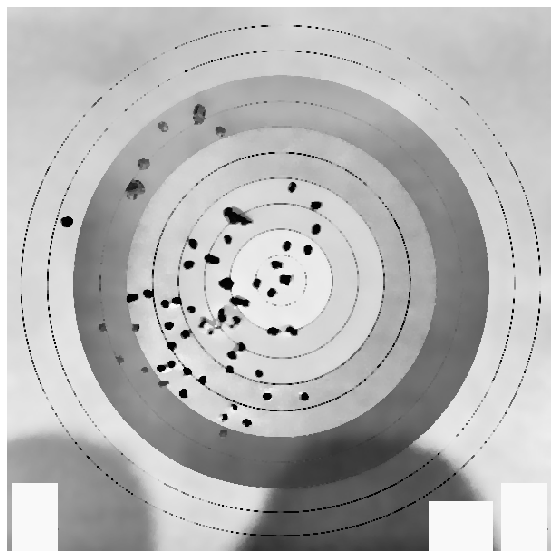

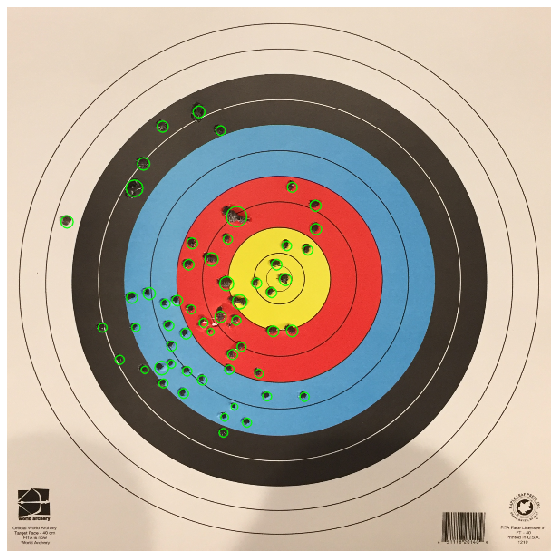

In [121]:
test_file = '../img/app_test/IMG_3557.JPG'
#test_file = '../img/app_test/IMG_3630.JPG'
#test_file = '../img/app_test/IMG_3631.JPG'

tr = target_reader()
result = tr.run(test_file)
if result:
    print(result)
for img in tr.stage_images:
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img)
    plt.show();

In [122]:
print(tr.score_step)
tr.df.head()

28.571428571428573


,x,y,radius,error,score,grp_x,grp_y,grp_score
0,306.677429,300.185913,6.712891,6.680017,10,382.073888,276.112046,8
1,296.944183,283.790527,5.850729,16.495000,10,372.340642,259.716660,8
2,291.466461,314.591583,5.509789,16.903715,10,366.862920,290.517716,8
3,274.983307,304.256439,5.509120,25.376213,10,350.379766,280.182572,9
4,308.191162,263.049744,5.215847,37.847280,9,383.587621,238.975876,7


In [123]:
import numpy as np
g = np.mean(tr.df[['x', 'y']], axis=0)
g['x']

224.6035412647685

In [124]:
np.mean(tr.df[['score', 'grp_score']], axis=0)

score        6.557377
grp_score    7.393443
dtype: float64

In [125]:
tr.df.describe()

,x,y,radius,error,score,grp_x,grp_y,grp_score
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,224.603541,324.073868,5.296637,118.330937,6.557377,300.000000,300.000000,7.393443
std,62.181490,84.574599,0.868192,56.146234,1.945290,62.181490,84.574599,1.705664
min,65.755257,115.175781,3.655535,6.680017,2.000000,141.151715,91.101914,3.000000
25%,178.097336,267.470886,4.814875,76.878735,5.000000,253.493795,243.397019,6.000000
50%,235.068741,333.116150,5.264844,114.955266,7.000000,310.465200,309.042282,8.000000
75%,259.591859,393.386841,5.872630,163.798511,8.000000,334.988318,369.312973,9.000000
max,340.414551,469.148743,7.451233,242.701449,10.000000,415.811010,445.074875,10.000000


In [126]:
tr.df['x'].std() / 600

0.10363581749741224

In [127]:
tr.df['y'].std() / 600

0.14095766422136113